### Methods for Image Processing
# __Morphological Operators and their simple use in Python__
## _Presentation by Stefano Di Patti - 09637A_

In the context of image processing the term **morphology mathematics** denotes the study of geometric structure of the image.
It is a useful tool for representation and description of the shape of a region. They can draw the contours, the skeleton, etc. It is a mathematical tool initially defined on binary images but easily extensible to images a shades of gray and then in color. In this presentation we will focus directly only on binary images. The image used (shown belove) is a 160x120 pixels, black-white and asymmetric.
**Operators** will be discussed in theory as well as in practice by using the famous library OpenCV.
For all techniques other than the image, a **kernel structuring element** is used to slide across the image. The structure of the image is “probed” with a user predet shape usually encoded from a small raster image (3×3 o 5×5). The structuring elements are defined relatively an origin (typically, it is the center of gravity). We can make use of NumPy’s ones() function to define a kernel.

The morphological processes can be formalized as set operation on set of points of the plane.
For sake of simplicity, points belonging to Z$^{2}$ are considered, but the morphological operation can be generalized for other domains (e.g., Z$^{n}$, or R$^{2}$).
Through these hypotheses it is possible to use set expressions to perform operations on the coordinates of the images:

- *a* $\in$ A *a* in A;
- *a* $\not \in$ A  *a* not in A;
- A $\subseteq$ B  is included in B;
- C = A  $\cup$ B  union;
- C = A  $\cap$ B  intersection;
- A $\cap$ B = $\varnothing$  empty intersection;
- A$^{c}$={*w* $\mid$ *w* $\not \in$ A} B  complement of A;
- A-B = {*w* $\mid$ *w* $\in$ A, w $\not \in$ B} = A $\cap$ B$^{c}$ set difference.

As well we can define logistic operators NOT, AND, OR.<br> Two operators deriving from the definitions are reflection and translation. Given A and B sets in Z$^{2}$:
<br>$\hat{B}$ = {*w* $\mid$ *w* = -*b*, $\forall$ *b* $\in$ B}, Reflection of B;<br>
(A)$_{z}$ = {*w* $\mid$ *w* = *a*+*z*, $\forall$ *a* $\in$ A}, Translation of A.

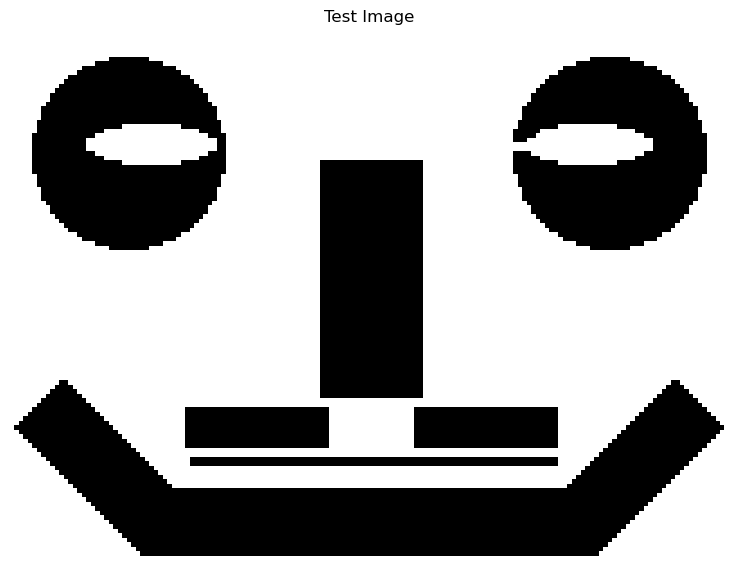

In [2]:
# import the necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
  
# read the image
img = cv2.imread(r"Desktop\mor_op.png", 0)

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 1
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Test Image")
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# invert the image
invert = cv2.bitwise_not(binr)

#### EROSION:
thin things out. $$ A \circleddash B = \{ z \mid (\hat{B})_{z} \cap A \subseteq A \} $$
The erosion effect is due to the fact that when the structuring element B is translated near the edges it is not completely contained in A.
Erosion primarily involves eroding the outer surface (the foreground) of the image as binary images only contain two pixels 0 and 255 so it is suggested to have the foreground as white. The thickness of erosion depends on the size and shape of the defined kernel.
OpenCV's function erodes the source image using the specified structuring element that determines the shape of a pixel neighborhood over which a specified minimum is taken. Parameters are self-explained.
Very useful for Granulometric Analysis.

Text(0.5, 1.0, 'Erosion')

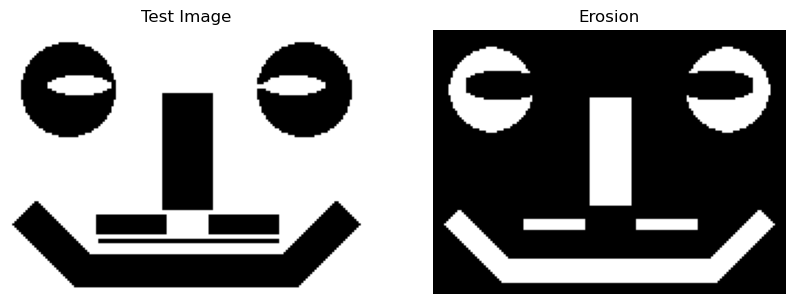

In [80]:
# define the kernel
kernel = np.ones((5, 5), np.uint8)
  
# erode the image
erosion = cv2.erode(invert, kernel,
                    iterations=1)

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Test Image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(erosion, cmap='gray')
plt.axis('off')
plt.title("Erosion")
  

#### DILATION:
expands objects. $$ A \oplus B = \{ z \mid (\hat{B})_{z} \cap A \neq \varnothing \} = \{ z \mid (\hat{B})_{z}\cap A \subseteq A \} $$
The expansion effect is due to the application of the element structuring B near the edges. From the definition it is clear that the structural element comes overturned with respect to its origin, through the operation of reflection, and shifted z positions through a translation. The result of the operator is the set of *z* positions such $(\hat{B})_{z}$ that intersects at least one element of A.
The function dilates the source image using the specified structuring element that determines the shape of a pixel neighborhood over which a specified maximum is taken.

Text(0.5, 1.0, 'Dilation')

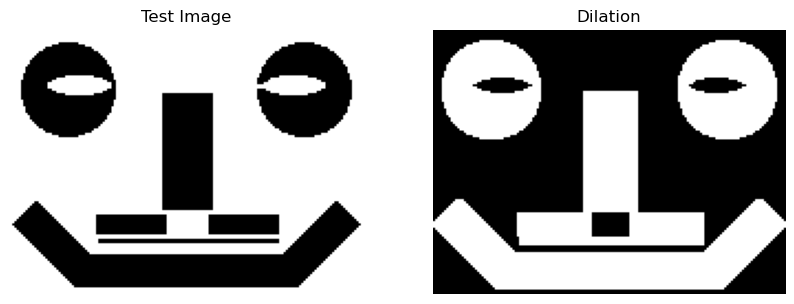

In [81]:
# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# dilate the image
dilation = cv2.dilate(invert, kernel, iterations=1)

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Test Image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(dilation, cmap='gray')
plt.axis('off')
plt.title("Dilation")

Erosion and dilation are operations dual with respect to the complement and reflection:
$$ (A \circleddash B)^{c} = \{ z \mid (B)_{z} \subseteq A \}^{c} = \{ z \mid (B)_{z} \cap A^{c} =\varnothing  \}^{c} = \{ z \mid (B)_{z} \cap A^{c} \neq \varnothing  \}^{c} = A \oplus \hat{B} $$
In Python this is shown simply by not inverting the image for example. The effect of erosion will be dilation and viceversa.
Since dilatation makes regions thicker and erosion makes them thins out, their difference emphasizes the boundaries between regions. The result is an image in which the borders between the objects are clearly visible and the contribution of homogeneous zones is not present. This process is defined as __Morphological Gradient__ and we show how computing it with OpenCV or with images difference.
Contours of A are also obtained by making A - ( A $\circleddash$ B ). 
An alternative to the morphological gradient is the Laplacian operator which tends to form closed contours. I consider the pixels that have value 0 to be black and white all the others (value 1 and -1).

Text(0.5, 1.0, 'Border Ext: Laplacian')

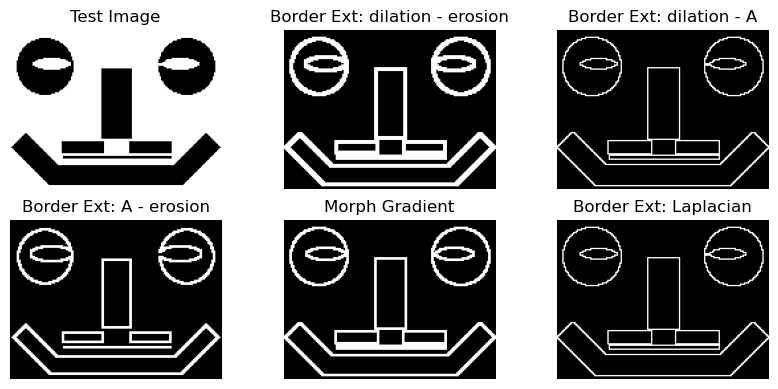

In [82]:
# border extraction procedures
border_extraction = invert - erosion;
border_extraction_2 = dilation - invert;
border_extraction_3 = dilation - erosion;
border_extraction_Laplacian = dilation + erosion - (2*invert);

# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,
                                  cv2.MORPH_GRADIENT, 
                                  kernel)

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 3
columns = 3
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Test Image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(border_extraction_3, cmap='gray')
plt.axis('off')
plt.title("Border Ext: dilation - erosion")

# Adds a subplot at the 3nd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(border_extraction_2, cmap='gray')
plt.axis('off')
plt.title("Border Ext: dilation - A")

# Adds a subplot at the 4nd position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(border_extraction, cmap='gray')
plt.axis('off')
plt.title("Border Ext: A - erosion")

# Adds a subplot at the 5nd position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(morph_gradient, cmap='gray')
plt.axis('off')
plt.title("Morph Gradient")

# Adds a subplot at the 6nd position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(border_extraction_Laplacian, cmap='gray')
plt.axis('off')
plt.title("Border Ext: Laplacian")

#### OPENING:
structured spike removal. $$ Opening(A,B) = A \circ B = (A \circleddash B) \oplus B = \cup \{(B_{z}) \mid (B_{z}) \subseteq A \}  $$ <br>
An erosion followed by a dilatation using itsame structural element. The effect of the opening is of preserve regions of similar shape as much as possible to the structuring element and to eliminate the different ones. It's a smoothing filter, of which power and type are determined by the shape and size of B.
Opening eliminates protrusions and bridges that are too thin. Geometrical interpretation results as the points of A covered by the translation of B along the inner border of A.

Text(0.5, 1.0, 'Opening')

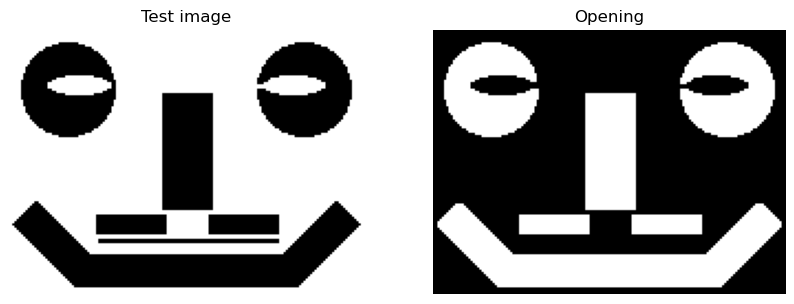

In [83]:
# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# opening the image
opening = cv2.morphologyEx(invert, cv2.MORPH_OPEN,
                           kernel, iterations=1)

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Test image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.title("Opening")

#### CLOSING:
structured filling of cavities. $$ Closing(A,B) = A \bullet B = (A \oplus B) \circleddash B $$ <br>
A dilatation followed by an erosion using the same structural element. The effect of the closing is to fill the gulfs and the holes that are too narrow. Geometrically results adding to A those points of the background that are not covered by the translation of B along the outer border of A.

Text(0.5, 1.0, 'Closing')

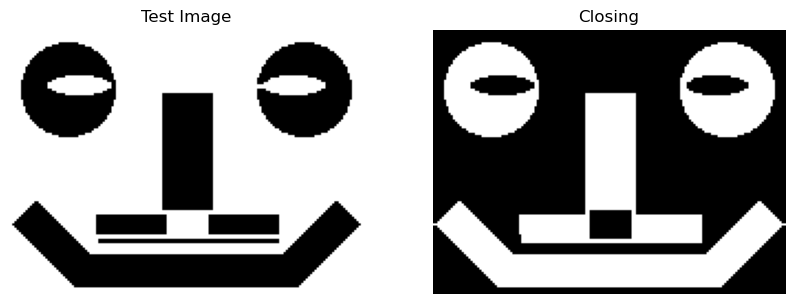

In [84]:
# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# opening the image
closing = cv2.morphologyEx(invert, cv2.MORPH_CLOSE, kernel, iterations=1)

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Test Image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(closing, cmap='gray')
plt.axis('off')
plt.title("Closing")

The following properties are valid:
- Opening and Closing Duality: $ (A \bullet B)^{c} = (A^{c} \circ \hat{B}) $
- Opening properties:
    - A $\circ$ B is a subset(subimage) of A;
    - If C is a subset of D, then C $\circ$ B is a subset of D $\circ$ B;
    - (A $\circ$ B) $\circ$ B = A $\circ$ B $\longleftrightarrow$ Multiple apply has no effect.
- Closing properties:
    - A $\bullet$ B is a subset(subimage) of A;
    - If C is a subset of D, then C $\bullet$ B is a subset of D $\bullet$ B;
    - (A $\bullet$ B) $\bullet$ B = A $\bullet$ B $\longleftrightarrow$ Multiple apply has no effect.

#### HIT OR MISS:
pattern matching and marking data X subset of W. $$ A*X = (A \circleddash X) \cap [A^{c} \circleddash (W-X)] $$
where (W - X) is the local background and $(A \circleddash X)$ is the erosion of A with the searched element X.
The same operator can be defined as: $ A*B=(A \circleddash B_{1}) \cap [A^{c} \circleddash B_{2}] $
where $B_{1}$ refers to the object and $B_{2}$ is the background. It's used as a detailed detector of the presence of
a shape within an image.
In practice, hit-or-miss transform can be realized using a single SE defined as the shape to be matched and a (one-pixel
tick) border.
$$ A \circledast B = {z \mid (B)_{z} \subseteq A}) $$
If the foreground and background pixels of the structuring element have an exactly match with the foreground and background pixels of the image, then the pixel corresponding to the position of the origin in the structuring element will be set to a 1, otherwise it is set to 0. 

Text(0.5, 1.0, 'Kernel')

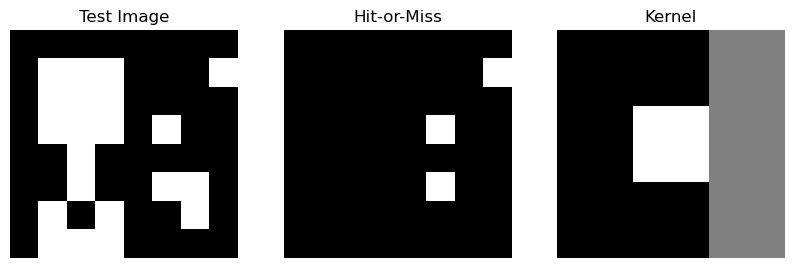

In [43]:
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")

kernel = np.array((
        [-1, -1, 0],
        [-1, 1, 0],
        [-1, -1, 0]), dtype="int")

output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel)
rate = 50
kernel = (kernel + 1) * 127
kernel = np.uint8(kernel)

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 3
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(input_image, cmap='gray')
plt.axis('off')
plt.title("Test Image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.title("Hit-or-Miss")

# Adds a subplot at the 3nd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(kernel, cmap='gray')
plt.axis('off')
plt.title("Kernel")

All previous OpenCV functions support the in-place mode. In case of multi-channel images, each channel is processed independently. 

#### THINNING:
The thinning operation reduces the shape of an object making the lines thinner. The hit-or-miss transformation here used does not require thelocal background.
Sometimes, defining different structuring elements for different directions and apply them in sequence can simplify the
procedure. Then, the results can be further processed for avoiding multiple paths (m-connectivity).
$$A \otimes B = A - (A \circledast B) = A \cap (A \circledast B)^{C}$$
Where $\circledast$ is the Hit/Miss Transform operation. This means we remove all those pixels whose neighborhood exactly matches the pixels in the SE. Instead of applying this with a single structuring element, it is a common practice to implement it using a sequence of SE so as to produce symmetric results. This operation is mostly applied iteratively until no further changes occur.
Thickening is the dual of thinning and thus is equivalent to applying the thinning operation on the background or on the complement of the set A. This method can produce disconnected points, which have to be removed, but the thinned background limits the thickening and the result is generally better than that obtained through the direct application of the thickening algorithm. The thicken operation is used to grow regions properly selected.
$$A \odot B = A \cup (A \circledast B)$$

Text(0.5, 1.0, 'Tickening')

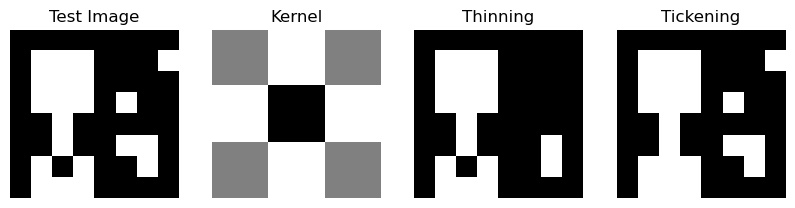

In [44]:
thinning = input_image - output_image

kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel)
rate = 50
kernel = (kernel + 1) * 127
kernel = np.uint8(kernel)

thickening = np.logical_or(input_image, output_image)

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 4
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(input_image, cmap='gray')
plt.axis('off')
plt.title("Test Image")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(kernel, cmap='gray')
plt.axis('off')
plt.title("Kernel")
  
# Adds a subplot at the 3nd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(thinning, cmap='gray')
plt.axis('off')
plt.title("Thinning")

# Adds a subplot at the 4nd position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(thickening, cmap='gray')
plt.axis('off')
plt.title("Tickening")

In OpenCV, by the way, two different implementations of Thinning are available for use: Zhang Suen and Guo's algorithms. It is also possible to implement thinning either using erosion and opening operators. This can be expressed as union of skeleton subsets where each subset is given by: $$ S_{n}(A) = (A \ominus nB) - (A \ominus nB) \circ B $$ $$ S(A) =\bigcup_{n=0}^{N} S_{n}(A) $$ where $n$ indicates the number of iterations of erosion and $N$ is the last iterative step before A erodes to the empty set (stopping condition).

Text(0.5, 1.0, 'Thinned Image')

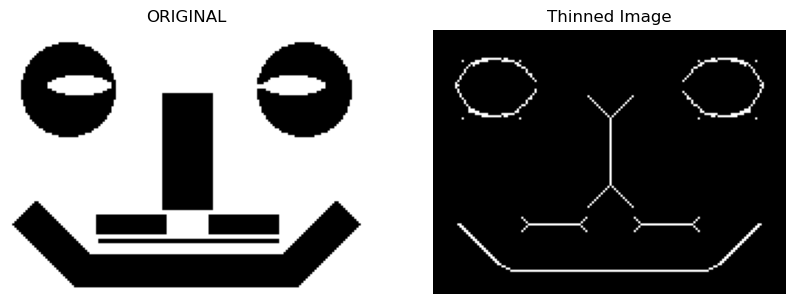

In [7]:
img1 = invert.copy()

# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
# Create an empty output image to hold values
thin = np.zeros(img.shape,dtype='uint8')

# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
    # Erosion
    erode = cv2.erode(img1,kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Subtract these two
    subset = erode - opening
    # Union of all previous sets
    thin = cv2.bitwise_or(subset,thin)
    # Set the eroded image for next iteration
    img1 = erode.copy()
    

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("ORIGINAL")

fig.add_subplot(rows, columns, 2)
  
# showing Thinned image
plt.imshow(thin, cmap='gray')
plt.axis('off')
plt.title("Thinned Image")

#### HOLE FILLING:
A _hole_ is a background region surrounded by a connected border of _foreground_ elements.
Let A a set containing 8-connected borders that enclose a background region (holes), which have to be filled (i.e., set to 1).
Iterative application of logical NOT, logical AND and dilation perform the topic. The process can be described with the following formula:
$$ X_{k} = dilate(X_{k-1},J) \cap A_{not} $$
where $ X_{k} $ is the region which, after the process convergence, fills the leading edge identified by A and $J$ is the structuring element.
A starting position have to be selected (manually or automatically, in this case we use the origin of the image);

Text(0.5, 1.0, 'Output')

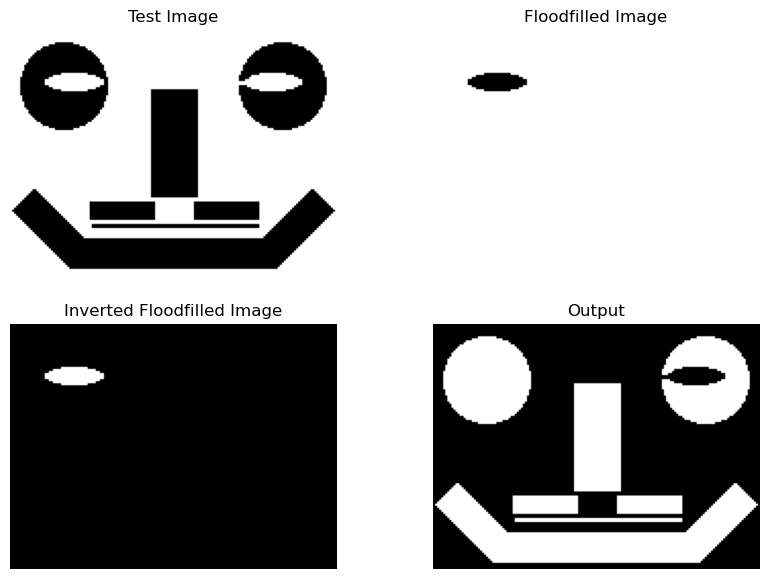

In [3]:
im_floodfill = invert.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = invert | im_floodfill_inv

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Test Image")


fig.add_subplot(rows, columns, 2)
  
# showing Floodfilled image
plt.imshow(im_floodfill, cmap='gray')
plt.axis('off')
plt.title("Floodfilled Image")


fig.add_subplot(rows, columns, 3)
  
# showing Inverted Floodfilled image
plt.imshow(im_floodfill_inv, cmap='gray')
plt.axis('off')
plt.title("Inverted Floodfilled Image")


fig.add_subplot(rows, columns, 4)
  
# showing Output image
plt.imshow(im_out, cmap='gray')
plt.axis('off')
plt.title("Output")

#### CONNECTED COMPONENTS:
It is an operation that allows you to find the connected components present in a binary image. Let A a set containing one or more connected components, $X_{0}$ a set containing a point for each connected components of A and $X_{k}$ is a set defined as follows:
$$ X_{k} = (X_{k-1},B) \cap A $$
For $X_{k} = X_{k-1}$, the set $X_{k}$ contains all the connected components of A.

Text(0.5, 1.0, 'Connected Components')

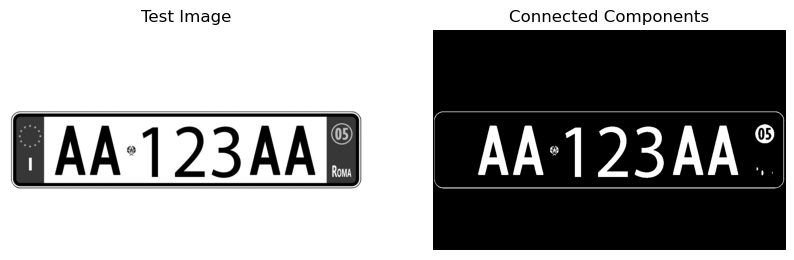

In [152]:
# read the image
image = cv2.imread(r"Desktop\targa.jpg", 0)

# binarize the image
binarize = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

#invert the image
inverted = cv2.bitwise_not(binarize)

output = cv2.connectedComponentsWithStats(inverted, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

# initialize an output mask to store all characters parsed from
# the license plate
mask = np.zeros(image.shape, dtype="uint8")

# loop over the number of unique connected component labels, skipping
# over the first label (as label zero is the background)
for i in range(1, numLabels):
    area = stats[i, cv2.CC_STAT_AREA]

    # ensure the area is neither too small
    # nor too big
    #print('area:',area)
    if (area >=10 and area < 7000):
        # construct a mask for the current connected component and
        # then take the bitwise OR with the mask
        #print("[INFO] keeping connected component '{}'".format(i))
        componentMask = (labels == i).astype("uint8") * 255
        mask = cv2.bitwise_or(mask, componentMask)
        

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Test Image")


fig.add_subplot(rows, columns, 2)
  
# showing Floodfilled image
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("Connected Components")

#### CONVEX HULL:
Calculate the convex hull (smallest convex) of all objects present in the image by treating them as a single object and returns a convex binary image. A region is convex if every segment joining two points belonging to the considered region is in the region.
$$ X^{i}_{k} = ( X_{k-1} \circledast B^{i}) \cup A \qquad i=1,2,3,4 \quad e \quad k=1,2,3,... \qquad con X^{i}_{0}=A $$
with $B^{i}$ being the structuring elements: $\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$ 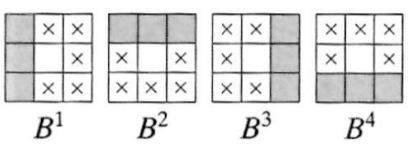 <br>
In the practice, starting from $A$, the hit-or-miss transformation with $B^{1}$ is iterated until it reach a stable state. Then, the process is repeated with $B^{2}$, $B^{3}$, and $B^{4}$.  Hit-or-miss transformation here used does not require the local background of the structuring element.Every $B^{i}$ add elements in a given direction. A useful technique consists in limiting the growing process only inside the smallest rectangle that contains $A$ (bounding box).
The Convex Hull of a shape or a group of points is a tight fitting convex boundary around the points or the shape. The Convex Hull of a convex object is simply its boundary, while of a concave shape is a convex boundary that most tightly encloses it. The algorithm implemented in OpenCV is one by Sklansky (1982) (seems to be incorrect but still gives good results).

Text(0.5, 1.0, 'Convex Hull')

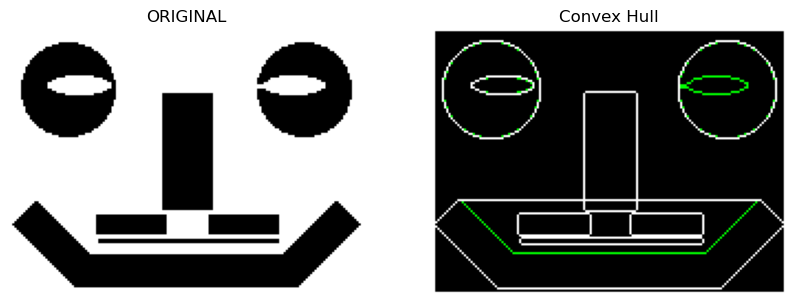

In [6]:
# Finding contours for the thresholded image
contours, hierarchy = cv2.findContours(binr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# create hull array for convex hull points
hull = []
 
# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))
# create an empty black image
drawing = np.zeros((binr.shape[0], binr.shape[1], 3), np.uint8)
 
# draw contours and hull points
for i in range(len(contours)):
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 255, 255) # rwhite - color for convex hull
    # draw ith contour
    cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object
    cv2.drawContours(drawing, hull, i, color, 1, 8)

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("ORIGINAL")


fig.add_subplot(rows, columns, 2)
  
# showing Convex Hull image
plt.imshow(drawing)
plt.axis('off')
plt.title("Convex Hull")

#### SKELETONIZATION:
Morphological operation that reduces the objects in a binary image to a set of thin lines that retain relevant information about the shape of the object. $$ S(A) =\bigcup_{k=0}^{K} S_{k}(A) \qquad con \quad S_{k}(A) = (A \ominus kB) - (A \ominus kB) \circ B$$ <br>
The skeleton, S(A), of a set A can be intuitively defined as the centers of the minimum collection of circular disks that covers A. More formally, the concept of maximum disk has to be defined:
- a disk (D)z , positioned in z ∈ A, is said maximum if no other disk completely in A that contains (D)z can be positioned;
- and the skeleton of A, S(A), can be defined as: S(A) = {z ∈ A |(D)z is a maximum disk in A}
The process belove is basically repeatedly eroding the image and refining the skeleton.

Text(0.5, 1.0, 'Skeleton Image')

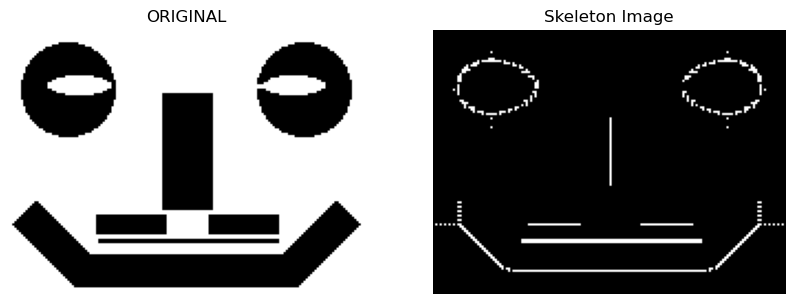

In [41]:
image = invert.copy()

# Step 1: Create an empty skeleton
size = np.size(invert)
skel = np.zeros(image.shape, np.uint8)

# Get a Cross Shaped Kernel
element = np.ones((3, 3), np.uint8)

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(image, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(image, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(image, element)
    skel = cv2.bitwise_or(skel,temp)
    image = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(image)==0:
        break

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("ORIGINAL")


fig.add_subplot(rows, columns, 2)
  
# showing Skeleton image
plt.imshow(skel, cmap='gray')
plt.axis('off')
plt.title("Skeleton Image")

The medial axis of an object is the set of all points having more than one closest point on the object’s boundary. It is often called the topological skeleton, because it is a 1-pixel wide skeleton of the object, with the same connectivity as the original object.
Here, we use the medial axis transform to compute the width of the foreground objects. As the function medial_axis (skimage.morphology.medial_axis) returns the distance transform in addition to the medial axis (with the keyword argument return_distance=True), it is possible to compute the distance to the background for all points of the medial axis with this function. This gives an estimate of the local width of the objects.
For a skeleton with fewer branches, there exists another skeletonization algorithm in skimage: skimage.morphology.skeletonize, that computes a skeleton by iterative morphological thinnings.
Skeleton Lee seems __Pruning__.

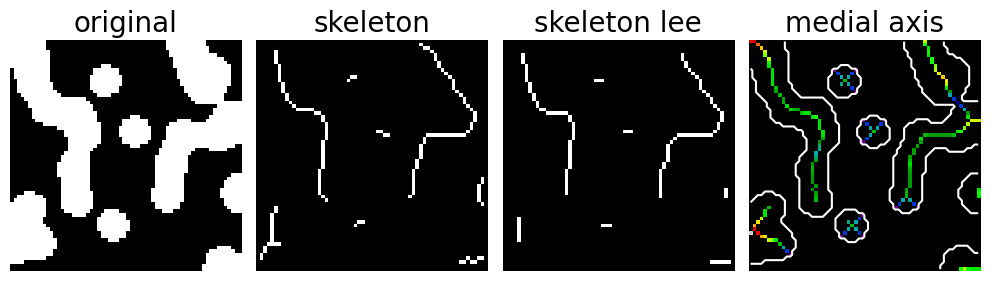

In [54]:
from skimage.morphology import skeletonize, medial_axis
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage.color import rgb2gray
import numpy as np
from scipy import ndimage

def microstructure(l=256):
    """
    Synthetic binary data: binary microstructure with blobs.
    Parameters
    ----------
    l: int, optional
        linear size of the returned image
    """
    n = 5
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l/2)**2 + (y - l/2)**2 < (l/2)**2
    mask = np.zeros((l, l))
    generator = np.random.RandomState(1)
    points = l * generator.rand(2, n**2)
    mask[(points[0]).astype(int), (points[1]).astype(int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l/(4.*n))
    return mask > mask.mean()

# Convert image
image = microstructure(l=64)
np.unique(image)
binary = image > filters.threshold_otsu(image)
np.unique(binary)

skeleton = skeletonize(binary)
skeleton_lee = skeletonize(binary, method='lee')

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(binary, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

# display results
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

ax[2].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title('skeleton lee', fontsize=20)

ax[3].imshow(dist_on_skel, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[3].contour(binary, [0.5], colors='w')
ax[3].axis('off')
ax[3].set_title('medial axis', fontsize=20)


fig.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
fig.tight_layout()
plt.show()

Other operations achievable using Morphological Operators are:
- Bridge -> Looks for groups of unconnected pixels and joins them by changing the 0 to 1.
- Clean -> This operation eliminates stray pixels. For example a single 1 surrounded by all 0's.
- Shrink -> This operation removes the pixels of the image so that objects without holes are reduced to a point and those with holes are reduced to a ring connected halfway between each hole and the outer contour.
- Pixel Filling -> This operation allows you to fill isolated pixels located within a binary image.
- Partial objects elimination.
- Geodesic dilation and erosion.
- Morphological Reconstruction.
- Top/Bottom Hat Transform.
